## Reading, understanding and cleaning data

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics  import r2_score


In [2]:
#Reading the dataset
bike_data=pd.read_csv('day.csv')

In [3]:
# Looking at the number of columns(features) and rows in the dataset.
bike_data.shape


(730, 16)

 - There are 730 rows and 16 columns

In [4]:
#Looking at the first few rows
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Changing column names for better interpretation.
bike_data.rename(columns={
    'instant':'record_id',
    "dteday":"date",
    "yr":"year",
    "mnth":"month",
    "weathersit":"weather_condition",
    "temp":"temperature",
    "atemp":"feeling_temperature",
    "hum":"humidity",
    "cnt":"total_count"
},inplace=True)

In [6]:
#Looking at all the column names
bike_data.columns

Index(['record_id', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temperature', 'feeling_temperature',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [7]:
#Looking at summary of the dataset.
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_id            730 non-null    int64  
 1   date                 730 non-null    object 
 2   season               730 non-null    int64  
 3   year                 730 non-null    int64  
 4   month                730 non-null    int64  
 5   holiday              730 non-null    int64  
 6   weekday              730 non-null    int64  
 7   workingday           730 non-null    int64  
 8   weather_condition    730 non-null    int64  
 9   temperature          730 non-null    float64
 10  feeling_temperature  730 non-null    float64
 11  humidity             730 non-null    float64
 12  windspeed            730 non-null    float64
 13  casual               730 non-null    int64  
 14  registered           730 non-null    int64  
 15  total_count          730 non-null    int

 - There are no null vales in the dataset.

In [8]:
# Collecting information about the features
bike_data.describe()

,record_id,season,year,month,holiday,weekday,workingday,weather_condition,temperature,feeling_temperature,humidity,windspeed,casual,registered,total_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# We can see that there are some variables in the data which should be converted from numeric to categorical variables.
# Giving string names to categorical variables and making them more readable and interpretable.

In [10]:
def map_month(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})
# Applying the function to the month column
bike_data[['month']] = bike_data[['month']].apply(map_month)

def map_season(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})
#Applying map function to season column
bike_data[['season']]=bike_data[['season']].apply(map_season)

def map_day(x):
    return x.map({1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thrs', 5: 'Fri', 6: 'Sat', 0: 'Sun'})
#Applying map function to weekday column
bike_data[['weekday']]=bike_data[['weekday']].apply(map_day)

#Giving weather conditions name as per the quality of weather for using a bike.
def map_weather(x):
    return x.map({1:'good',2:'moderate',3:'bad',4:'very bad'})
#Applying map function to weather column
bike_data[['weather_condition']]=bike_data[['weather_condition']].apply(map_weather)

In [11]:
# Checking the datatype of categorical variables
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_id            730 non-null    int64  
 1   date                 730 non-null    object 
 2   season               730 non-null    object 
 3   year                 730 non-null    int64  
 4   month                730 non-null    object 
 5   holiday              730 non-null    int64  
 6   weekday              730 non-null    object 
 7   workingday           730 non-null    int64  
 8   weather_condition    730 non-null    object 
 9   temperature          730 non-null    float64
 10  feeling_temperature  730 non-null    float64
 11  humidity             730 non-null    float64
 12  windspeed            730 non-null    float64
 13  casual               730 non-null    int64  
 14  registered           730 non-null    int64  
 15  total_count          730 non-null    int

 - Removing record id column as it is not required in the model


In [12]:
bike_data=bike_data.drop('record_id',axis=1)

 - We also remove columns 'registered' and 'casual' as registered+casual=total_count. Therefore we dontrequire column 'registered' and 'casual'.

In [13]:
bike_data=bike_data.drop(['registered','casual'],axis=1)

In [14]:
#Checking shape of the dataset
bike_data.shape

(730, 13)

## Data Visualization

###### Visualizing numeric data

In [15]:
numeric_columns=['temperature','feeling_temperature','windspeed','humidity','total_count']

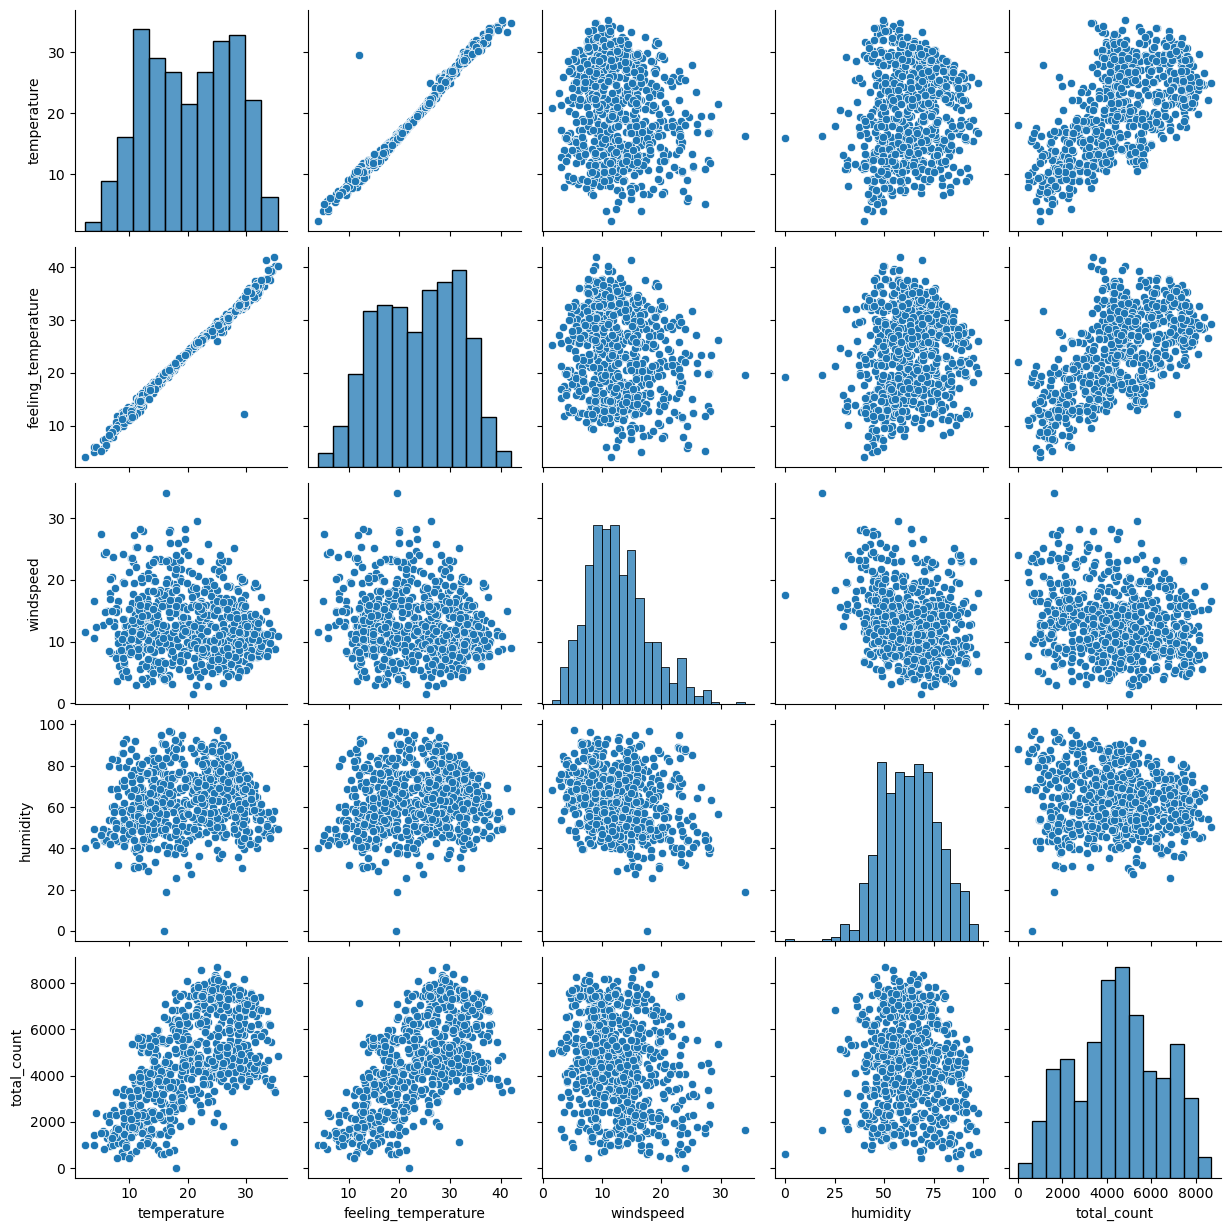

In [16]:
# Using pairplot for numeric column to visualize.
sns.pairplot(bike_data[numeric_columns])
plt.show()

 - We can see there is a strong linear relation between temperature and feeling temperature.
 - Total count also has a linear relationship with temperature and feeling temperature

###### Visualizing categorical columns

In [17]:
categorical_variables=['season','year','month','holiday','weekday','workingday','weather_condition']

In [18]:
# Setting the fontsize in the plots.
plt.rc('font', size=30)
plt.rc('axes', titlesize=30) 
plt.rc('axes', labelsize=30)
plt.rc('legend', fontsize=30)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)

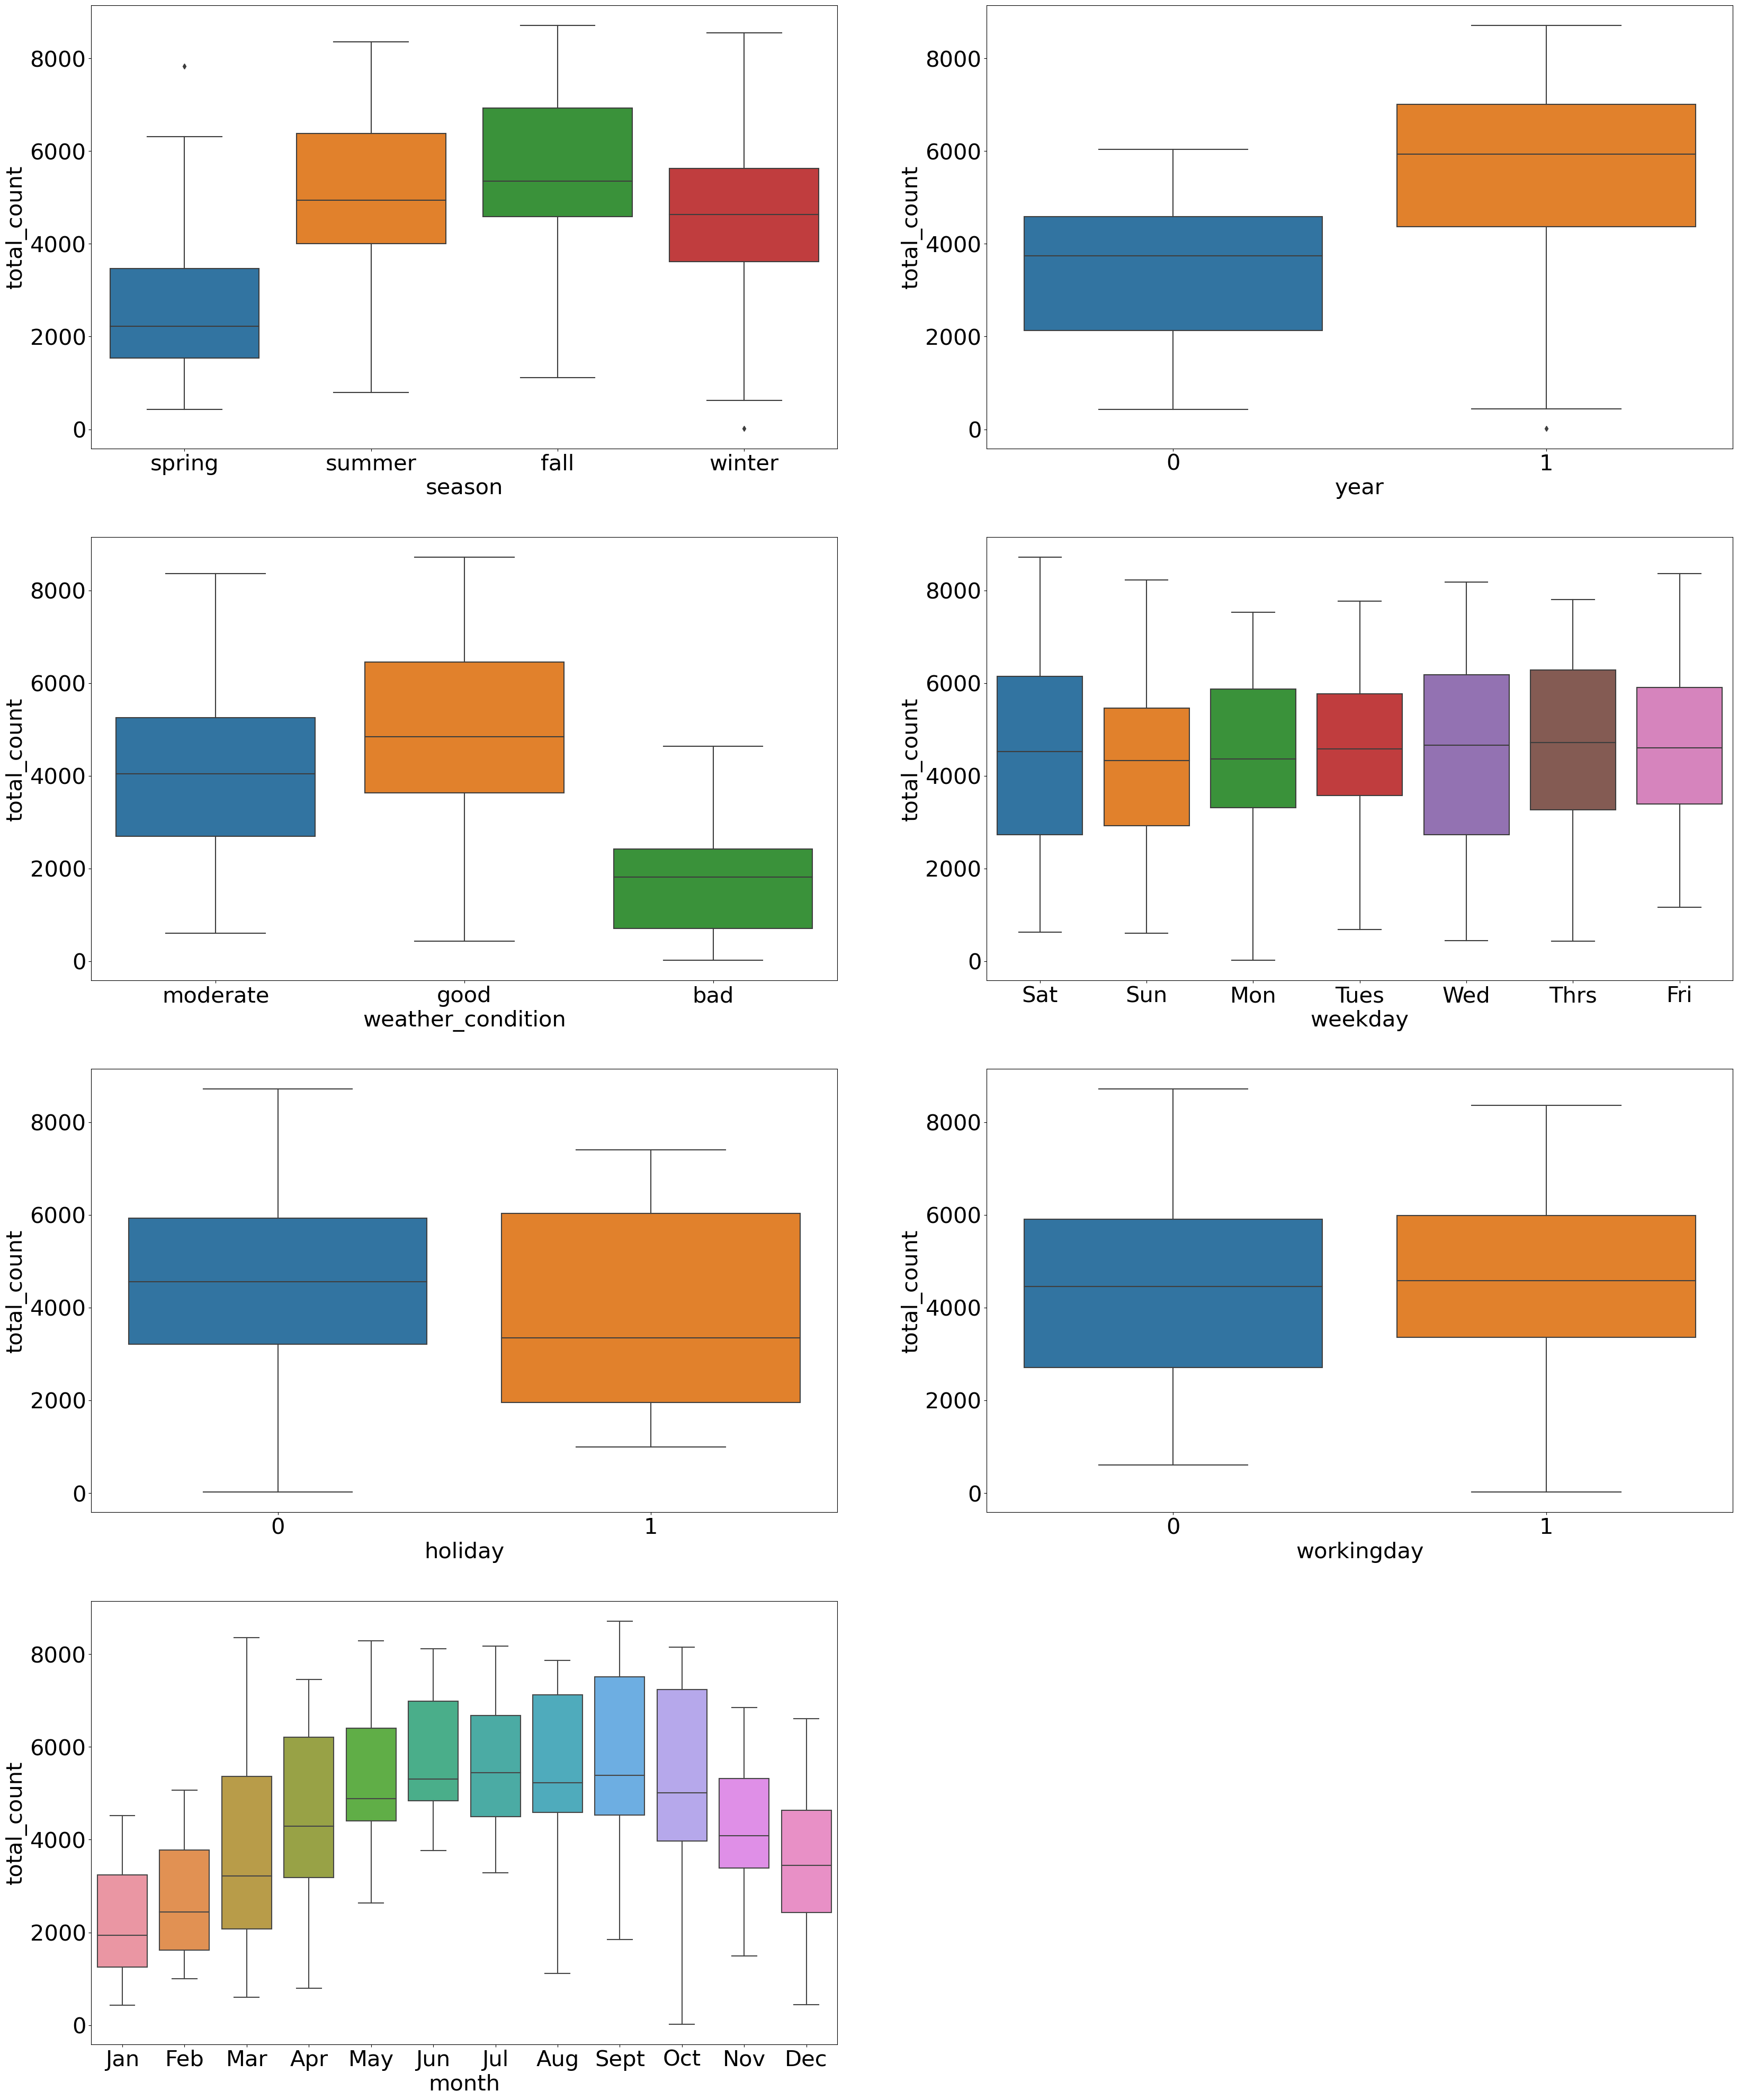

In [19]:
# Plotting boxplot for all categorical variables.
plt.figure(figsize=(40,50))

plt.subplot(4,2,1)
sns.boxplot(x='season', y='total_count', data=bike_data)

plt.subplot(4,2,2)
sns.boxplot(x='year', y='total_count', data=bike_data)

plt.subplot(4,2,3)
sns.boxplot(x='weather_condition', y='total_count', data=bike_data)

plt.subplot(4,2,4)
sns.boxplot(x='weekday', y='total_count', data=bike_data)

plt.subplot(4,2,5)
sns.boxplot(x='holiday', y='total_count', data=bike_data)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='total_count', data=bike_data)

plt.subplot(4,2,7)
sns.boxplot(x='month',y='total_count',data=bike_data)

plt.show()

 - Year, Season, Weather_condition and month seems to have a high correlation with the total_count.
 - The demand for bikes in year is 2019 is more than in 2018.
 -  We can see that spring and winter season have lesser demand for bikes than summer and fall season with spring having the least demand amongst all.
 - The weather trend can also be seen in the month column where Jan, Feb, Mar have spring and Oct, Nov, Dec have winter season. This shows there is a correlation between month column and season.
 - The demand for bikes decreases as the weather goes from good , moderate to bad. Bad weather has significantly lesser demands.
 -  It seems columns Weekday, workingday , holiday do not affect the bike demand i.e. total_count column much.
 - The median and range of bike demands is lesser if it is a holiday then if it is not a holiday.

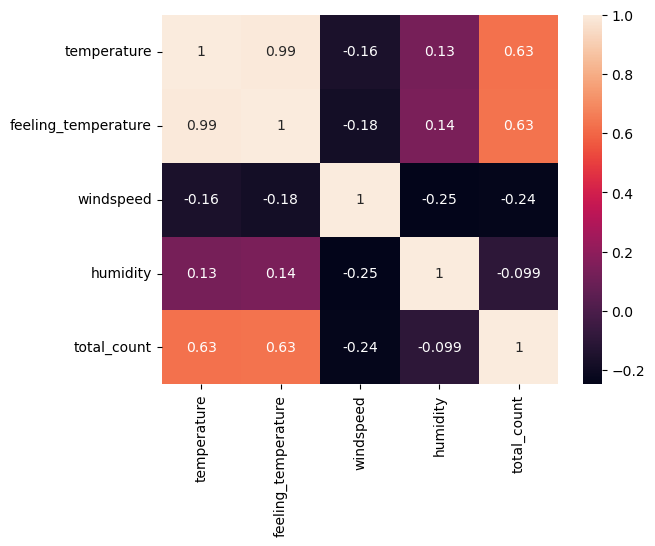

In [20]:
# Chceking correlations of numeric columns
plt.rc('font', size=10)
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10)
sns.heatmap(bike_data[numeric_columns].corr(),annot=True)
plt.show()

 - As we can see from the correlation and the scatterplot, temperature and feeling temperature are highly correlated so we remove temperature.


In [21]:
bike_data=bike_data.drop(['feeling_temperature'],axis=1)

## Data Preparation

In [22]:
bike_data.head()

,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature,humidity,windspeed,total_count
0,01-01-2018,spring,0,Jan,0,Sat,0,moderate,14.110847,80.5833,10.749882,985
1,02-01-2018,spring,0,Jan,0,Sun,0,moderate,14.902598,69.6087,16.652113,801
2,03-01-2018,spring,0,Jan,0,Mon,1,good,8.050924,43.7273,16.636703,1349
3,04-01-2018,spring,0,Jan,0,Tues,1,good,8.200000,59.0435,10.739832,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,good,9.305237,43.6957,12.522300,1600


In [23]:
# Removing date column as we have month and year information in separate colummns and do not need date in our model.
bike_data=bike_data.drop(['date'],axis=1)

In [24]:
#Checking for unique values in columns of the dataset
bike_data.nunique()

season                 4
year                   2
month                 12
holiday                2
weekday                7
workingday             2
weather_condition      3
temperature          498
humidity             594
windspeed            649
total_count          695
dtype: int64

In [25]:
#Performing one hot encoding for categorical variables except the variables which are binary.
encoding_variables=['season','month','weekday','weather_condition']

In [26]:
encoding_df=bike_data[encoding_variables]
encoding_df.head()

,season,month,weekday,weather_condition
0,spring,Jan,Sat,moderate
1,spring,Jan,Sun,moderate
2,spring,Jan,Mon,good
3,spring,Jan,Tues,good
4,spring,Jan,Wed,good


In [27]:
# One hot encoding dataframe
encoding_df = pd.get_dummies(encoding_df, drop_first=True)
encoding_df

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrs,weekday_Tues,weekday_Wed,weather_condition_good,weather_condition_moderate
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# Deleting original columns from the dataframe whose one hot encoding is being done.
bike_data=bike_data.drop(encoding_variables,axis=1)

In [29]:
# Concatenating one hot encoding od categorical variables with the original dataframe
bike_data=pd.concat([bike_data,encoding_df],axis=1)

In [30]:
# Shape of the dataframe after EDA. We can see we have 28 columns now.
bike_data.shape

(730, 29)

In [31]:
# Checking datatype of the columns in the dataframe
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temperature                 730 non-null    float64
 4   humidity                    730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   total_count                 730 non-null    int64  
 7   season_spring               730 non-null    uint8  
 8   season_summer               730 non-null    uint8  
 9   season_winter               730 non-null    uint8  
 10  month_Aug                   730 non-null    uint8  
 11  month_Dec                   730 non-null    uint8  
 12  month_Feb                   730 non-null    uint8  
 13  month_Jan                   730 non

In [32]:
# Final columns in the dataframe after EDA.
bike_data.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'total_count', 'season_spring', 'season_summer', 'season_winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thrs', 'weekday_Tues', 'weekday_Wed', 'weather_condition_good',
       'weather_condition_moderate'],
      dtype='object')

## Model building and evaluation

In [33]:
#Splitting the dataset into train and test det.
train,test=train_test_split(bike_data,train_size=0.7,random_state=100)
#Checking shape of train and test dataset
print(train.shape,test.shape)

(510, 29) (220, 29)


In [34]:
# Scaling the numeric columns in the train dataset.Min max scaling has been used.
numeric_columns=['temperature','windspeed','humidity','total_count']
scaler=MinMaxScaler()
train[numeric_columns]=scaler.fit_transform(train[numeric_columns])

In [35]:
# The variables has been appropriately scalled.
train.describe()

,year,holiday,workingday,temperature,humidity,windspeed,total_count,season_spring,season_summer,season_winter,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrs,weekday_Tues,weekday_Wed,weather_condition_good,weather_condition_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Making x,y pairs i.e. predictors and label from the training data.
y_train=train.pop('total_count')
X_train=train

In [37]:
X_train.shape

(510, 28)

#### Building first model with all the features

In [38]:
X_train_c=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_c).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.00e-181
Time:                        09:05:49   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

 - This model has an Adjusted R-squared value of 84.4% which seems pretty good. We try to reduce the number of features and exclude ones which are highly correlated and those which are not much relevant in explaining the target variable.

#### Building model with RFE for feature selection.

In [39]:
lr=LinearRegression()
lr=lr.fit(X_train,y_train)
lr

LinearRegression()

In [40]:
# We use RFE for reducing the features from 28 to 14 and then manually try reduce the features as it is difficult to do it entirely manually.
rfe=RFE(lr,n_features_to_select=14)
rfe=rfe.fit(X_train,y_train)

In [41]:
# Check which columns are selected after using RFE and the ranking of the unselected features.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('month_Aug', False, 6),
 ('month_Dec', False, 11),
 ('month_Feb', False, 14),
 ('month_Jan', False, 15),
 ('month_Jul', True, 1),
 ('month_Jun', False, 9),
 ('month_Mar', False, 4),
 ('month_May', False, 5),
 ('month_Nov', False, 10),
 ('month_Oct', False, 3),
 ('month_Sept', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thrs', False, 12),
 ('weekday_Tues', False, 8),
 ('weekday_Wed', False, 13),
 ('weather_condition_good', True, 1),
 ('weather_condition_moderate', True, 1)]

In [42]:
# Columns selected after RFE.
col=train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_Jul', 'month_Sept',
       'weekday_Sat', 'weekday_Sun', 'weather_condition_good',
       'weather_condition_moderate'],
      dtype='object')

In [43]:
# Input columns selected after RFE. There are 14 features left now.
X_train_rfe=X_train[col]
X_train_rfe.head()

,year,holiday,workingday,temperature,humidity,windspeed,season_spring,season_winter,month_Jul,month_Sept,weekday_Sat,weekday_Sun,weather_condition_good,weather_condition_moderate
576,1,0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1


In [44]:
# Fitting model for 14 features and checking summary.
X_train_rfe=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          9.38e-190
Time:                        09:05:49   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0436      0.037      1.191      0.234      -0.028       0.115
year                           0.2308      0.008     28.455      0.000       0.215       0.247
holiday                       -0.0580      0.023     -2.575      0.010      -0.102      -0.014
workingday                     0.0448      0.011      4.010      0.000       0.023       0.067
temperature                    0.4776      0.031     15.613      0.000       0.418       0.538
humidity                      -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed                     -0.1687      0.025     -6.616      0.000      -0.219      -0.119
season_spring                 -0.1080      0.015     -7.280      0.000      -0.137      -0.079
season_winter                  0.0558      0.012      4.528      0.000       0.032       0.080
month_Jul                     -0.0782      0.017     -4.571      0.000      -0.112      -0.045
month_Sept                     0.0591      0.015      3.829      0.000       0.029       0.089
weekday_Sat                    0.0546      0.013      4.224      0.000       0.029       0.080
weekday_Sun                    0.0021      0.014      0.155      0.877      -0.025       0.029
weather_condition_good         0.2499      0.026      9.482      0.000       0.198       0.302
weather_condition_moderate     0.1921      0.025      7.694      0.000       0.143       0.241
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     2.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
# Checking VIF for multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new=X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.22
10,weekday_Sat,20.27
11,weekday_Sun,19.68
12,weather_condition_good,10.23
13,weather_condition_moderate,8.85
1,holiday,4.36
3,temperature,2.99
6,season_spring,2.55
4,humidity,1.89
7,season_winter,1.78


In [46]:
# weekday_Sun has a high p-value and high VIF ,so we drop weekday_Sun column.

In [47]:
X_train1=X_train_new.drop('weekday_Sun',axis=1)
X_train1.shape

(510, 13)

In [48]:
#Fitting with 13 features.
X_train1_lm=sm.add_constant(X_train1)
lr=sm.OLS(y_train,X_train1_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          9.38e-190
Time:                        09:05:49   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [49]:
X_train_new=X_train1
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,21.83
3,temperature,18.76
11,weather_condition_good,12.57
12,weather_condition_moderate,8.28
2,workingday,5.39
5,windspeed,4.31
6,season_spring,3.06
7,season_winter,2.23
0,year,2.08
10,weekday_Sat,1.99


In [50]:
#humidity column has high VIF,ehich means there is a mutlicollinearity, so we remove it.

In [51]:
X_train2=X_train_new.drop('humidity',axis=1)
X_train2.shape

(510, 12)

In [52]:
X_train2_lm=sm.add_constant(X_train2)
lr=sm.OLS(y_train,X_train2_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.26e-187
Time:                        09:05:49   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
X_train_new=X_train2
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temperature,12.97
10,weather_condition_good,12.09
11,weather_condition_moderate,6.83
2,workingday,5.24
4,windspeed,4.30
5,season_spring,2.63
0,year,2.07
9,weekday_Sat,1.97
6,season_winter,1.73
7,month_Jul,1.38


 - All p values are in the permissible range but temperature has a high VIF, as temperature has high correlation with the target variable and is important to predict the bike demand, so we remove ' weather_condition_good' which alse has high VIF.


In [54]:
# Removing weather_condition_good as it has high VIF.
X_train3=X_train_new.drop('weather_condition_good',axis=1)
X_train3.shape

(510, 11)

In [55]:
# Training on 11 features.
X_train3_lm=sm.add_constant(X_train3)
lr=sm.OLS(y_train,X_train3_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     172.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.98e-162
Time:                        09:05:50   Log-Likelihood:                 439.85
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     498   BIC:                            -804.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
X_train_new=X_train3
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temperature,6.81
2,workingday,4.95
4,windspeed,4.09
0,year,2.05
9,weekday_Sat,1.90
5,season_spring,1.88
10,weather_condition_moderate,1.52
6,season_winter,1.46
7,month_Jul,1.36
8,month_Sept,1.20


In [57]:
# holiday has h high p value, so we remove holiday column.

In [58]:
X_train4=X_train_new.drop('holiday',axis=1)
X_train4_lm=sm.add_constant(X_train4)
lr=sm.OLS(y_train,X_train4_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.01e-162
Time:                        09:05:50   Log-Likelihood:                 438.54
No. Observations:                 510   AIC:                            -855.1
Df Residuals:                     499   BIC:                            -808.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [59]:
#Checking VIF 
X_train_new=X_train4
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temperature,6.54
1,workingday,4.45
3,windspeed,4.06
0,year,2.05
4,season_spring,1.81
8,weekday_Sat,1.79
9,weather_condition_moderate,1.52
5,season_winter,1.42
6,month_Jul,1.36
7,month_Sept,1.19


In [60]:
# Dropping workingday and not temperature (although it has h high VIF) because temperature has high positive correlation wuth the target variable.

In [61]:
X_train5=X_train_new.drop('workingday',axis=1)
X_train5_lm=sm.add_constant(X_train5)
lr=sm.OLS(y_train,X_train5_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.86e-161
Time:                        09:05:50   Log-Likelihood:                 431.80
No. Observations:                 510   AIC:                            -843.6
Df Residuals:                     500   BIC:                            -801.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [62]:
X_train_new=X_train5
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temperature,4.64
2,windspeed,3.96
0,year,2.05
3,season_spring,1.64
8,weather_condition_moderate,1.49
4,season_winter,1.36
5,month_Jul,1.35
6,month_Sept,1.19
7,weekday_Sat,1.18


In [63]:
# Dropping weekday_Sat column as it has high p value.

In [64]:
X_train6=X_train5.drop('weekday_Sat',axis=1)
X_train6_lm=sm.add_constant(X_train6)
lr=sm.OLS(y_train,X_train6_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     228.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.13e-161
Time:                        09:05:50   Log-Likelihood:                 430.48
No. Observations:                 510   AIC:                            -843.0
Df Residuals:                     501   BIC:                            -804.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [65]:
X_train_new=X_train6
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temperature,4.61
2,windspeed,3.93
0,year,2.05
3,season_spring,1.63
7,weather_condition_moderate,1.49
4,season_winter,1.35
5,month_Jul,1.35
6,month_Sept,1.19


 - All the VIF values and p-values are in the permissible range now.
 - All the p values are less than 0.05 and VIF <5 .
 - Also the Adjusted R-squared value has dropped from 84.4%  with 28 variables to just 78.1% using 8 variables. 
 - This model is explaining most of the variance without being too complex.

###### We proceed with this model and check for assumptions of Linear Regression and make predictions.

## Validate assumptions

##### Residual Analysis

In [66]:
#Making predictions for training dataset
y_train_pred=lr.predict(X_train6_lm)


C:\Users\bhuta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


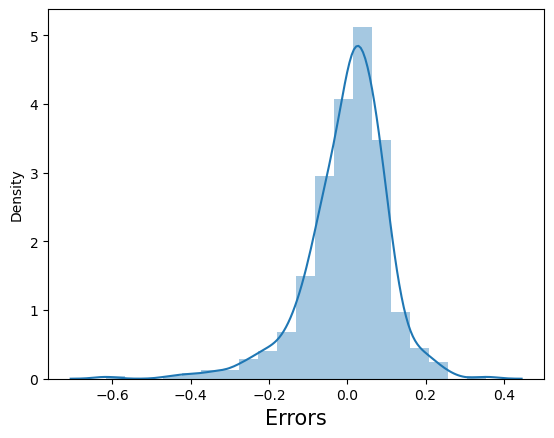

In [67]:
#Plotting histogram of error terms
sns.distplot((y_train-y_train_pred),bins=20) 
plt.xlabel('Errors', fontsize = 15)  
plt.show()

#### The error terms are fairly normally distributed with mean =0.

C:\Users\bhuta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


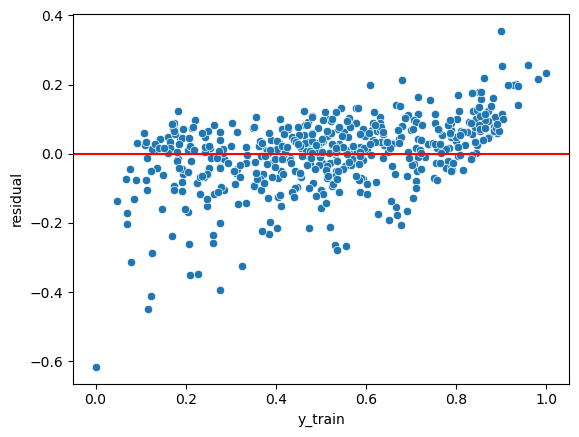

In [68]:
sns.scatterplot(y_train,(y_train-y_train_pred))
plt.xlabel('y_train')
plt.ylabel('residual')
plt.axhline(y = 0, color = 'r', linestyle = '-')
  
plt.show()

- Error terms do not follow a pattern.They are independent of each other.
- Homoscadiscity- Errors terms have constant variance.

In [69]:
vif

,Features,VIF
1,temperature,4.61
2,windspeed,3.93
0,year,2.05
3,season_spring,1.63
7,weather_condition_moderate,1.49
4,season_winter,1.35
5,month_Jul,1.35
6,month_Sept,1.19


##### VIF <5, shows that there is no multicollinearity.

## Making predictions

In [70]:
# Selected columns ater feature selection.
cols=X_train6.columns
cols

Index(['year', 'temperature', 'windspeed', 'season_spring', 'season_winter',
       'month_Jul', 'month_Sept', 'weather_condition_moderate'],
      dtype='object')

In [71]:
#Scaling the test set.
# Features to be scaled are -numeric_columns=['feeling_temperature','windspeed','humidity','total_count']

test[numeric_columns] = scaler.transform(test[numeric_columns])

In [72]:
# Making X , y pairs from test set.
y_test=test.pop('total_count')
X_test=test

In [73]:
# Taking the selected 8 columns from the test set.
X6_test=X_test[cols]
X6_test.shape

(220, 8)

In [74]:
# Add a constant to the test set created
X6_test_lm = sm.add_constant(X6_test)
X6_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       220 non-null    float64
 1   year                        220 non-null    int64  
 2   temperature                 220 non-null    float64
 3   windspeed                   220 non-null    float64
 4   season_spring               220 non-null    uint8  
 5   season_winter               220 non-null    uint8  
 6   month_Jul                   220 non-null    uint8  
 7   month_Sept                  220 non-null    uint8  
 8   weather_condition_moderate  220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.7 KB


In [75]:
# Making predictions
y_test_pred = lr.predict(X6_test_lm)

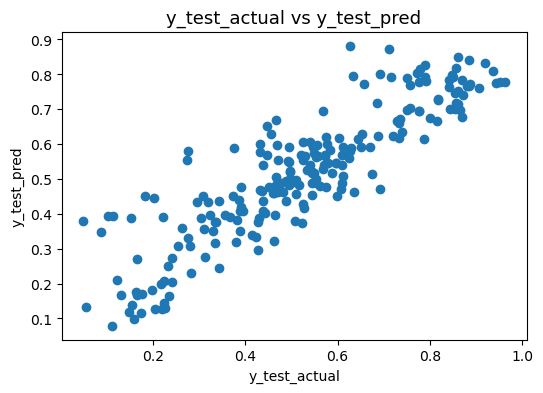

In [76]:
# Plotting y_test and y_pred 
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_test_pred)
plt.title('y_test_actual vs y_test_pred', fontsize = 13)              
plt.xlabel('y_test_actual', fontsize = 10)                        
plt.ylabel('y_test_pred', fontsize = 10)  
plt.show()

 - The predicted value and the actual value of the test set are linearly correlated.

##### From the above plot, it's evident that the model is doing well on the test set as well.

#### R2 and adjusted R2 score for training dataset

In [77]:
print("r2 score   ",r2_score(y_true = y_train, y_pred = y_train_pred))
print("adjusted r2 score   ",0.781)

r2 score    0.7846775008264812
adjusted r2 score    0.781


#### R2 and adjusted R2 score for test dataset

In [78]:
# R2 score for testing dataset.
#Here, n is the rows & p is the columns
n = X6_test.shape[0]
p = X6_test.shape[1]
r2 = r2_score(y_test, y_test_pred)
adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
print("r2 score   ",r2_score(y_true = y_test, y_pred = y_test_pred))
print("adjusted r2 score   ",adj_r2)

r2 score    0.77831071980434
adjusted r2 score    0.7699054390386277


#### We have the model with 8 variables, the r-squared on training and test data is about 78.5% and 77.8% respectively . The adjusted r2 score is 78.1% on the training set and 76.99% on the test set.

###### We can go ahead with this model, it is a simple model with no multicollinearity, with 8 predictors and a good r2 score. 

## Conclusions about the model

#### Coefficients of the final predictors.

 - const   :                       0.2429     
 - year     :                      0.2400     
 - temperature    :                0.4599
 - windspeed        :             -0.1694      
 - season_spring     :            -0.1104      
 - season_winter      :            0.0302      
 - month_Jul           :          -0.0760     
 - month_Sept           :          0.0435      
 - weather_condition_moderate  :   -0.0649  

#### As per the Final Model, the top 3 Predictor Variables that are needed for the prediction purposes are:
- temperature - Coefficient of temperature indicates that a unit increase in temperature variable, will increase bike demand by 0.4599 values.
- year - Coefficient of year indicates that a unit increase in year variable, will incrrease the bikedemands by 0.2400 values.
- windspeed - Coefficient of windspeed indicates that a unit increase in windspeed variable, will decrease the bike demand by 0.1694 values.


##### The other predictors of the model are-

 - season_spring
 - month_Sept 
 - month_Jul
 - weather_condition_moderate
 - season_winter
